In [1]:
import scenic
from scenic.simulators.carla.simulator import CarlaSimulator
from scenic.syntax.veneer import localPath

MAX_STEPS = 100

realization = {}
realization['max_steps'] = MAX_STEPS



scenario = scenic.scenarioFromFile('test.scenic', params={'use2DMap': True, "realization":realization})
scene, _ = scenario.generate()
print("a")
simulator = CarlaSimulator(carla_map = 'Town01', map_path = localPath('../../multi_objective/maps/Town01.xodr'))
print('b')
simulation = simulator.simulate(scene, maxSteps=100)


/home/ekin/anaconda3/envs/scenic4rl/lib/python3.8/site-packages/scenic/core/errors.py:245: UserWarning: unable to install sys.excepthook to format Scenic backtraces
  warnings.warn('unable to install sys.excepthook to format Scenic backtraces')


a
b


In [9]:
from pprint import pp
import carla

In [12]:
ego = realization['ego']
pp(dir(ego))
pp(dir(ego.carlaActor))



['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_allProperties',
 '_applySpecifiers',
 '_cached_polygon',
 '_conditioned',
 '_constProps',
 '_control',
 '_copyWith',
 '_crossing',
 '_defaults',
 '_dependencies',
 '_dynamicProperties',
 '_dynamicProxy',
 '_element',
 '_getClosestTrafficLight',
 '_intersection',
 '_lane',
 '_laneGroup',
 '_laneSection',
 '_override',
 '_register',
 '_relations',
 '_requiredProperties',
 '_revert',
 '_road',
 '_specify',
 '_withProperties',
 'allowCollisions',
 'angularSpeed',
 'back',
 'backLeft',
 'backRight',
 'behavior',
 'blueprint',
 'cameraOffset',
 'canSee',
 'carlaActor',
 'color',
 'condition

carla.libcarla.VehicleWheelLocation(1)

In [32]:
ego.right

OrientedPoint({'mutationScale': 0, 'visibleDistance': 50.0, 'length': 0.0, 'viewAngle': 6.283185307179586, 'regionContainedIn': None, 'headingStdDev': 0.08726646259971647, 'mutator': (<scenic.core.object_types.HeadingMutator object at 0x7f319c684160>, <scenic.core.object_types.PositionMutator object at 0x7f319c6846d0>), 'width': 0.0, 'position': (392.4085694628643 @ -286.09146162006533), 'positionStdDev': 1.0, 'heading': -3.141203975057194})

In [3]:
pp([realization['trajectory'][i]['velocity'] for i in range(len(realization['trajectory']))])

[[(0.0, -0.0), (0.0, -0.0)],
 [(0.0, -0.0), (0.0, -0.0)],
 [(2.5297536922153085e-05, -0.06521116942167282),
  (-9.77786562827987e-09, 6.398181290334648e-11)],
 [(0.0005484337452799082, -0.4335598945617676),
  (-4.7235598543693413e-08, -2.6584372481153196e-09)],
 [(-0.003725600428879261, -0.8114976286888123),
  (-1.3017746880450431e-07, 9.5009600187268e-09)],
 [(-0.006839906331151724, -1.2586345672607422),
  (1.4037824236368124e-08, 8.243732363411027e-10)],
 [(-0.007762337103486061, -1.7471966743469238),
  (-1.5558919486124978e-08, -2.343815419525441e-10)],
 [(-0.010917899198830128, -2.283621311187744),
  (5.283290249735728e-08, 2.4513188701114075e-10)],
 [(-0.01284437719732523, -2.747748613357544),
  (4.3596536158929666e-08, -1.1835966928774866e-10)],
 [(-0.014938147738575935, -3.22198224067688),
  (-2.0746301743201911e-07, -1.7594780077345717e-09)],
 [(-0.017096227034926414, -3.7039260864257812),
  (2.3913635516237264e-08, -6.697883359052526e-10)],
 [(-0.019169485196471214, -4.1534738

In [4]:
pp([(realization['trajectory'][i]['position'][0], realization['trajectory'][i]['position'][1]) for i in range(len(realization['trajectory']))])

[((128.671630859375, -194.28524780273438, -0.20579998195171356),
  (118.1716537475586, -194.3114471435547, -0.20579999685287476)),
 ((128.671630859375, -194.28524780273438, -0.45570001006126404),
  (118.1716537475586, -194.3114471435547, -0.45570001006126404)),
 ((128.671630859375, -194.28524780273438, -0.803600013256073),
  (118.1716537475586, -194.3114471435547, -0.803600013256073)),
 ((128.66941833496094, -194.28524780273438, -1.2256324291229248),
  (118.1716537475586, -194.3114471435547, -1.215551495552063)),
 ((128.6586456298828, -194.2853240966797, -1.281895399093628),
  (118.17133331298828, -194.3115234375, -1.2495198249816895)),
 ((128.60777282714844, -194.28518676757812, -1.2574502229690552),
  (118.17135620117188, -194.31153869628906, -1.2204240560531616)),
 ((128.51797485351562, -194.2854461669922, -1.2388038635253906),
  (118.17146301269531, -194.3114776611328, -1.1985783576965332)),
 ((128.3953857421875, -194.28575134277344, -1.227888822555542),
  (118.17154693603516, -194

In [4]:
ego = realization['ego']
pp(dir(ego))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getnewargs_ex__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_allProperties',
 '_boundingPolygon',
 '_cache_clearers',
 '_cached__boundingPolygon',
 '_cached__isPlanarBox',
 '_cached_occupiedSpace',
 '_clearCaches',
 '_conditioned',
 '_constProps',
 '_control',
 '_copyWith',
 '_corners2D',
 '_crossing',
 '_defaults',
 '_dependencies',
 '_dynamicFinalProperties',
 '_dynamicProperties',
 '_dynamicProxy',
 '_element',
 '_finalProperties',
 '_getClosestTrafficLight',
 '_hasStaticBounds',
 '_intersection',
 '_isConvex',
 '_isLazy',
 '_isPlanarBox',
 '_lane',
 '_laneGroup',
 '_laneSection',
 '_needsLazyEval',
 '_needsSampling',
 '_nonObservingEntity

In [5]:
mesh_1 = realization['mesh'][0]
mesh_2 = realization['mesh'][1]

In [6]:
pp(list(dir(mesh_1)))

['__abstractmethods__',
 '__add__',
 '__annotations__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_cache',
 '_data',
 '_visual',
 'apply_obb',
 'apply_scale',
 'apply_transform',
 'apply_translation',
 'area',
 'area_faces',
 'body_count',
 'bounding_box',
 'bounding_box_oriented',
 'bounding_cylinder',
 'bounding_primitive',
 'bounding_sphere',
 'bounds',
 'center_mass',
 'centroid',
 'compute_stable_poses',
 'contains',
 'convert_units',
 'convex_decomposition',
 'convex_hull',
 'copy',
 'density',
 'difference',
 'edges',
 'edges_face',
 'edges_sorted',
 'edges_sorted_tree',
 'edges_sparse

In [7]:
import shapely

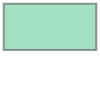

In [8]:
coords = ((0., 0.), (0., 0.5), (1., 0.5), (1., 0.), (0., 0.))

polygon = shapely.Polygon(coords)
polygon


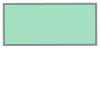

In [9]:
ego.bottomSurface._boundingPolygon

In [10]:
polygon_1 = ego.bottomSurface._boundingPolygon
polygon_2 = ego._boundingPolygon

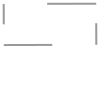

In [75]:
polygon_1.difference(polygon_2)

In [70]:
pp(ego.bottomSurface._boundingPolygon.exterior.coords.xy)

(array('d', [126.41913987609404, 126.41915041600735, 130.91911428943942, 130.91912483193732, 130.9191253760959, 130.92411569786452, 130.92411520631066, 130.9241046663973, 126.42414079296526, 126.42413025046737, 126.42412970630879, 126.41913938454019, 126.41913987609404]),
 array('d', [-193.29086610165382, -193.29086555749524, -193.27963726452958, -193.27963775608345, -193.2796482959968, -195.27961995189784, -195.27963049439575, -195.27963103855433, -195.29085933151998, -195.29085883996612, -195.29084830005277, -193.29087664415147, -193.29086610165382]))


In [47]:
pp(ego._boundingPolygon.exterior.coords.xy)

(array('d', [126.41913935694566, 126.42412973390331, 130.92411572545905, 130.91912534850138, 126.41913935694566]),
 array('d', [-193.29086558508976, -195.2908593591145, -195.2796310109598, -193.27963723693506, -193.29086558508976]))


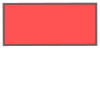

In [11]:
polygon = shapely.MultiPolygon([ego._boundingPolygon, ego.bottomSurface._boundingPolygon])
polygon

In [25]:
dir(ego.boundingBox)

['AABB',
 '__abstractmethods__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_boundingPolygon',
 '_boundingPolygonHull',
 '_bufferOverapproximate',
 '_conditioned',
 '_dependencies',
 '_erodeOverapproximate',
 '_isConvex',
 '_isLazy',
 '_mesh',
 '_needsLazyEval',
 '_needsSampling',
 '_requiredProperties',
 '_trueContainsPoint',
 'boundingPolygon',
 'centerMesh',
 'circumcircle',
 'conditionTo',
 'containsObject',
 'containsPoint',
 'containsRegion',
 'containsRegionInner',
 'deserializeValue',
 'difference',
 'dimensionality',
 'dimensions',
 'distanceTo',
 'evaluateIn',
 'evaluateInner',
 'fromFile',
 

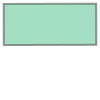

In [21]:
ego.occupiedSpace.boundingPolygon.polygons

In [19]:
pp(dir(ego.occupiedSpace.boundingPolygon))

['AABB',
 '__abstractmethods__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_conditioned',
 '_dependencies',
 '_isLazy',
 '_needsLazyEval',
 '_needsSampling',
 '_points',
 '_polygon',
 '_polygons',
 '_requiredProperties',
 '_samplingData',
 '_trueContainsPoint',
 'area',
 'boundary',
 'buffer',
 'conditionTo',
 'containsObject',
 'containsPoint',
 'containsRegion',
 'containsRegionInner',
 'deserializeValue',
 'difference',
 'dimensionality',
 'distanceTo',
 'evaluateIn',
 'evaluateInner',
 'footprint',
 'getContextValues',
 'inradius',
 'intersect',
 'intersects',
 'makeContext',
 'name',
 'orient',
 'orientation',
 '

In [13]:
pp(dir(ego))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getnewargs_ex__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_allProperties',
 '_boundingPolygon',
 '_cache_clearers',
 '_cached__boundingPolygon',
 '_cached__isPlanarBox',
 '_cached_occupiedSpace',
 '_clearCaches',
 '_conditioned',
 '_constProps',
 '_control',
 '_copyWith',
 '_corners2D',
 '_crossing',
 '_defaults',
 '_dependencies',
 '_dynamicFinalProperties',
 '_dynamicProperties',
 '_dynamicProxy',
 '_element',
 '_finalProperties',
 '_getClosestTrafficLight',
 '_hasStaticBounds',
 '_intersection',
 '_isConvex',
 '_isLazy',
 '_isPlanarBox',
 '_lane',
 '_laneGroup',
 '_laneSection',
 '_needsLazyEval',
 '_needsSampling',
 '_nonObservingEntity

In [9]:
pp(dir(ego.shape))

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_cached_isConvex',
 '_mesh',
 'containsCenter',
 'dimensions',
 'fromFile',
 'height',
 'isConvex',
 'length',
 'mesh',
 'raw_dimensions',
 'scale',
 'width']


In [20]:
print(mesh_1.bounding)
print(mesh_2.vertices)

<trimesh.primitives.Box>
[[-0.5 -0.5 -0.5]
 [-0.5 -0.5  0.5]
 [-0.5  0.5 -0.5]
 [-0.5  0.5  0.5]
 [ 0.5 -0.5 -0.5]
 [ 0.5 -0.5  0.5]
 [ 0.5  0.5 -0.5]
 [ 0.5  0.5  0.5]]
